## Import Necessary Libraries

In [2]:
import gdown
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from shutil import copyfile
import matplotlib.pyplot as plt
import sys
import tensorflow_hub as hub
from PIL import Image
sys.modules['Image'] = Image

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12429369917879379946
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10062135296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8172087924801435955
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Prepare Dataset

In [4]:
# download_url = "https://drive.google.com/uc?export=download&id=16mgKYPM2tVUKZpaB2cSDkM2seRPkwWIV"
# destination_path = os.path.join(os.getcwd(), "data.zip")

# gdown.download(download_url, destination_path, quiet=False)
# with zipfile.ZipFile(destination_path, 'r') as zip_ref:
#     zip_ref.extractall("./data")

In [3]:
IMAGE_SIZE = (224,224)

In [4]:
source_path = './data/Garbage classification/'

source_path_besi = os.path.join(source_path, 'besi')
source_path_kaca = os.path.join(source_path, 'kaca')
source_path_kardus = os.path.join(source_path, 'kardus')
source_path_kertas = os.path.join(source_path, 'kertas')
source_path_organik = os.path.join(source_path, 'organik')
source_path_plastik = os.path.join(source_path, 'plastik')

print(f"There are {len(os.listdir(source_path_besi))} images of besi.")
print(f"There are {len(os.listdir(source_path_kaca))} images of kaca.")
print(f"There are {len(os.listdir(source_path_kardus))} images of kardus.")
print(f"There are {len(os.listdir(source_path_kertas))} images of kertas.")
print(f"There are {len(os.listdir(source_path_organik))} images of organik.")
print(f"There are {len(os.listdir(source_path_plastik))} images of plastik.")

There are 410 images of besi.
There are 501 images of kaca.
There are 403 images of kardus.
There are 594 images of kertas.
There are 600 images of organik.
There are 482 images of plastik.


In [5]:
root_dir = './data/garbage_training/'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_path = os.path.join(root_path, 'training')
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(os.path.join(train_path, 'besi'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'kaca'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'kardus'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'kertas'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'organik'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'plastik'), exist_ok=True)

  validation_path = os.path.join(root_path, 'validation')
  os.makedirs(validation_path, exist_ok=True)    
  os.makedirs(os.path.join(validation_path, 'besi'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'kaca'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'kardus'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'kertas'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'organik'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'plastik'), exist_ok=True)
  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print(f"The folder and file is already existe on the {root_dir}")

In [6]:
# Check current parent and child directory of root_dir
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./data/garbage_training/training
./data/garbage_training/validation
./data/garbage_training/training\besi
./data/garbage_training/training\kaca
./data/garbage_training/training\kardus
./data/garbage_training/training\kertas
./data/garbage_training/training\organik
./data/garbage_training/training\plastik
./data/garbage_training/validation\besi
./data/garbage_training/validation\kaca
./data/garbage_training/validation\kardus
./data/garbage_training/validation\kertas
./data/garbage_training/validation\organik
./data/garbage_training/validation\plastik


In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  filenames = os.listdir(SOURCE_DIR)

  random.shuffle(filenames)

  split_index = int(SPLIT_SIZE * len(filenames))

  training_filenames = filenames[:split_index]
  validation_filenames = filenames[split_index:]

  for filename in training_filenames:
    source = os.path.join(SOURCE_DIR, filename)
    destination = os.path.join(TRAINING_DIR, filename)
    shutil.copyfile(source, destination)

  for filename in validation_filenames:
    source = os.path.join(SOURCE_DIR, filename)
    destination = os.path.join(VALIDATION_DIR, filename)
    shutil.copyfile(source, destination)

In [8]:
BESI_SOURCE_DIR = "./data/Garbage classification/besi/"
KACA_SOURCE_DIR = "./data/Garbage classification/kaca/"
KARDUS_SOURCE_DIR = "./data/Garbage classification/kardus/"
KERTAS_SOURCE_DIR = "./data/Garbage classification/kertas/"
ORGANIK_SOURCE_DIR = "./data/Garbage classification/organik/"
PLASTIK_SOURCE_DIR = "./data/Garbage classification/plastik/"

TRAINING_DIR = "./data/garbage_training/training/"
VALIDATION_DIR = "./data/garbage_training/validation/"

TRAINING_BESI_DIR = os.path.join(TRAINING_DIR, "besi/")
VALIDATION_BESI_DIR = os.path.join(VALIDATION_DIR, "besi/")

TRAINING_KACA_DIR = os.path.join(TRAINING_DIR, "kaca/")
VALIDATION_KACA_DIR = os.path.join(VALIDATION_DIR, "kaca/")

TRAINING_KARDUS_DIR = os.path.join(TRAINING_DIR, "kardus/")
VALIDATION_KARDUS_DIR = os.path.join(VALIDATION_DIR, "kardus/")

TRAINING_KERTAS_DIR = os.path.join(TRAINING_DIR, "kertas/")
VALIDATION_KERTAS_DIR = os.path.join(VALIDATION_DIR, "kertas/")

TRAINING_ORGANIK_DIR = os.path.join(TRAINING_DIR, "organik/")
VALIDATION_ORGANIK_DIR = os.path.join(VALIDATION_DIR, "organik/")

TRAINING_PLASTIK_DIR = os.path.join(TRAINING_DIR, "plastik/")
VALIDATION_PLASTIK_DIR = os.path.join(VALIDATION_DIR, "plastik/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BESI_DIR)) > 0:
  for file in os.scandir(TRAINING_BESI_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KACA_DIR)) > 0:
  for file in os.scandir(TRAINING_KACA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KARDUS_DIR)) > 0:
  for file in os.scandir(TRAINING_KARDUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KERTAS_DIR)) > 0:
  for file in os.scandir(TRAINING_KERTAS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ORGANIK_DIR)) > 0:
  for file in os.scandir(TRAINING_ORGANIK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PLASTIK_DIR)) > 0:
  for file in os.scandir(TRAINING_PLASTIK_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_BESI_DIR)) > 0:
  for file in os.scandir(VALIDATION_BESI_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KACA_DIR)) > 0:
  for file in os.scandir(VALIDATION_KACA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KARDUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_KARDUS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KERTAS_DIR)) > 0:
  for file in os.scandir(VALIDATION_KERTAS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ORGANIK_DIR)) > 0:
  for file in os.scandir(VALIDATION_ORGANIK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PLASTIK_DIR)) > 0:
  for file in os.scandir(VALIDATION_PLASTIK_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8
split_data(BESI_SOURCE_DIR, TRAINING_BESI_DIR, VALIDATION_BESI_DIR, split_size)
split_data(KACA_SOURCE_DIR, TRAINING_KACA_DIR, VALIDATION_KACA_DIR, split_size)
split_data(KARDUS_SOURCE_DIR, TRAINING_KARDUS_DIR, VALIDATION_KARDUS_DIR, split_size)
split_data(KERTAS_SOURCE_DIR, TRAINING_KERTAS_DIR, VALIDATION_KERTAS_DIR, split_size)
split_data(ORGANIK_SOURCE_DIR, TRAINING_ORGANIK_DIR, VALIDATION_ORGANIK_DIR, split_size)
split_data(PLASTIK_SOURCE_DIR, TRAINING_PLASTIK_DIR, VALIDATION_PLASTIK_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original besi directory has {len(os.listdir(BESI_SOURCE_DIR))} images")
print(f"Original kaca directory has {len(os.listdir(KACA_SOURCE_DIR))} images")
print(f"Original kardus directory has {len(os.listdir(KARDUS_SOURCE_DIR))} images")
print(f"Original kertas directory has {len(os.listdir(KERTAS_SOURCE_DIR))} images")
print(f"Original organik directory has {len(os.listdir(ORGANIK_SOURCE_DIR))} images")
print(f"Original plastik directory has {len(os.listdir(PLASTIK_SOURCE_DIR))} images")
print()

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BESI_DIR))} images of besi for training")
print(f"There are {len(os.listdir(TRAINING_KACA_DIR))} images of kaca for training")
print(f"There are {len(os.listdir(TRAINING_KARDUS_DIR))} images of kardus for training")
print(f"There are {len(os.listdir(TRAINING_KERTAS_DIR))} images of kertas for training")
print(f"There are {len(os.listdir(TRAINING_ORGANIK_DIR))} images of organik for training")
print(f"There are {len(os.listdir(TRAINING_PLASTIK_DIR))} images of plastik for training")
print(f"There are {len(os.listdir(VALIDATION_BESI_DIR))} images of besi for validation")
print(f"There are {len(os.listdir(VALIDATION_KACA_DIR))} images of kaca for validation")
print(f"There are {len(os.listdir(VALIDATION_KARDUS_DIR))} images of kardus for validation")
print(f"There are {len(os.listdir(VALIDATION_KERTAS_DIR))} images of kertas for validation")
print(f"There are {len(os.listdir(VALIDATION_ORGANIK_DIR))} images of organik for validation")
print(f"There are {len(os.listdir(VALIDATION_PLASTIK_DIR))} images of plastik for validation")

Original besi directory has 410 images
Original kaca directory has 501 images
Original kardus directory has 403 images
Original kertas directory has 594 images
Original organik directory has 600 images
Original plastik directory has 482 images

There are 328 images of besi for training
There are 400 images of kaca for training
There are 322 images of kardus for training
There are 475 images of kertas for training
There are 480 images of organik for training
There are 385 images of plastik for training
There are 82 images of besi for validation
There are 101 images of kaca for validation
There are 81 images of kardus for validation
There are 119 images of kertas for validation
There are 120 images of organik for validation
There are 97 images of plastik for validation


In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1. / 255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      brightness_range=(0.8, 1.2),
                                      fill_mode="nearest")
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))
  
  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2390 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


## Model with Transfer Learning

In [36]:
# Load the base model
base_model = VGG16(include_top=False, weights="imagenet", input_shape=(256, 256, 3))

In [37]:
def create_vgg_model(base_model, num_classes=6):
  # Freeze previous model
  for layer in base_model.layers:
    layer.trainable = False
  
  # Create the classifier model
  model = tf.keras.models.Sequential()
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

In [38]:
import tensorflow as tf
tf.test.is_gpu_available() #should return True 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [39]:
model = create_vgg_model(base_model)

history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
299/299 [==============================] - 34s 110ms/step - loss: 1.2687 - accuracy: 0.5510 - val_loss: 0.7704 - val_accuracy: 0.6617
Epoch 2/10
299/299 [==============================] - 32s 108ms/step - loss: 0.8720 - accuracy: 0.6402 - val_loss: 0.7567 - val_accuracy: 0.6867
Epoch 3/10
299/299 [==============================] - 32s 107ms/step - loss: 0.8471 - accuracy: 0.6385 - val_loss: 0.6460 - val_accuracy: 0.7417
Epoch 4/10
299/299 [==============================] - 33s 110ms/step - loss: 0.7417 - accuracy: 0.6904 - val_loss: 0.6035 - val_accuracy: 0.7317
Epoch 5/10
299/299 [==============================] - 32s 106ms/step - loss: 0.7279 - accuracy: 0.7025 - val_loss: 0.5482 - val_accuracy: 0.7867
Epoch 6/10
299/299 [==============================] - 33s 110ms/step - loss: 0.6679 - accuracy: 0.7197 - val_loss: 0.5217 - val_accuracy: 0.8067
Epoch 7/10
299/299 [==============================] - 32s 107ms/step - loss: 0.6764 - accuracy: 0.7293 - val_loss: 0.5611 - val_ac

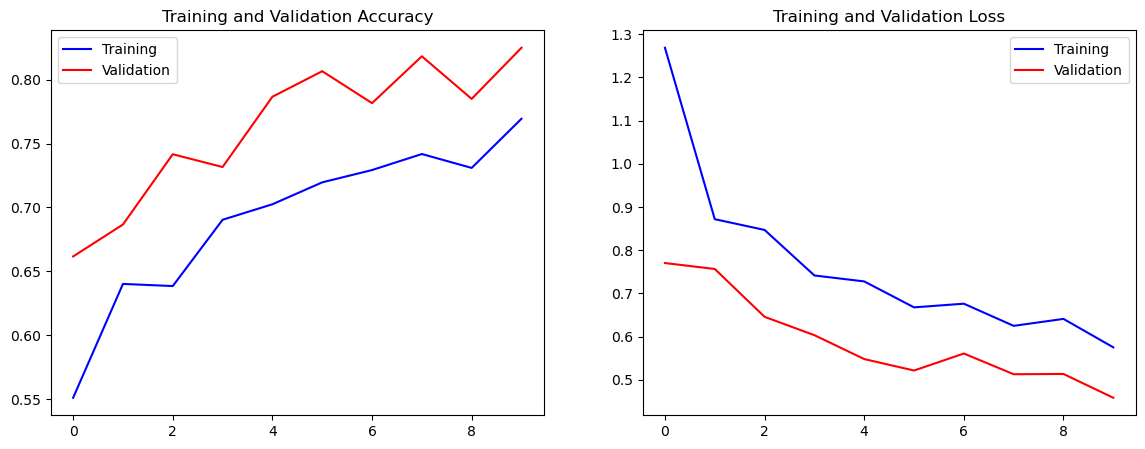

In [40]:
plt.figure(figsize=(14, 5))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot visualization
plt.subplot(1, 2, 1)
accuracy_plot, = plt.plot(epochs, accuracy, color="blue")
val_accuracy_plot, = plt.plot(epochs, val_accuracy, color="red")
plt.title('Training and Validation Accuracy')
plt.legend([accuracy_plot, val_accuracy_plot],['Training', 'Validation'])


plt.subplot(1, 2, 2)
loss_plot, = plt.plot(epochs, loss, color="blue")
val_loss_plot, = plt.plot(epochs, val_loss, color="red")
plt.title('Training and Validation Loss')
plt.legend([loss_plot, val_loss_plot],['Training', 'Validation'])

In [ ]:
model.save('model_tl_resnet50.h5')

## Model with Feature Vector

In [17]:
MODULE_HANDLE = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
feature_extractor = hub.KerasLayer(MODULE_HANDLE, input_shape=IMAGE_SIZE + (3,)) # Default trainable = False

In [29]:
def create_model(num_classes=6):
  model = tf.keras.models.Sequential([ 
    feature_extractor,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ]) 
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

In [30]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
75/75 [==============================] - 28s 353ms/step - loss: 0.9081 - accuracy: 0.6569 - val_loss: 0.4564 - val_accuracy: 0.8433
Epoch 2/15
75/75 [==============================] - 26s 340ms/step - loss: 0.5083 - accuracy: 0.8172 - val_loss: 0.3619 - val_accuracy: 0.8733
Epoch 3/15
75/75 [==============================] - 25s 336ms/step - loss: 0.4153 - accuracy: 0.8477 - val_loss: 0.3835 - val_accuracy: 0.8750
Epoch 4/15
75/75 [==============================] - 26s 346ms/step - loss: 0.3513 - accuracy: 0.8736 - val_loss: 0.3319 - val_accuracy: 0.8767
Epoch 5/15
75/75 [==============================] - 27s 354ms/step - loss: 0.3054 - accuracy: 0.8941 - val_loss: 0.3390 - val_accuracy: 0.8850
Epoch 6/15
75/75 [==============================] - 26s 344ms/step - loss: 0.2730 - accuracy: 0.8958 - val_loss: 0.3192 - val_accuracy: 0.8917
Epoch 7/15
75/75 [==============================] - 26s 348ms/step - loss: 0.2433 - accuracy: 0.9126 - val_loss: 0.3362 - val_accuracy: 0.8900

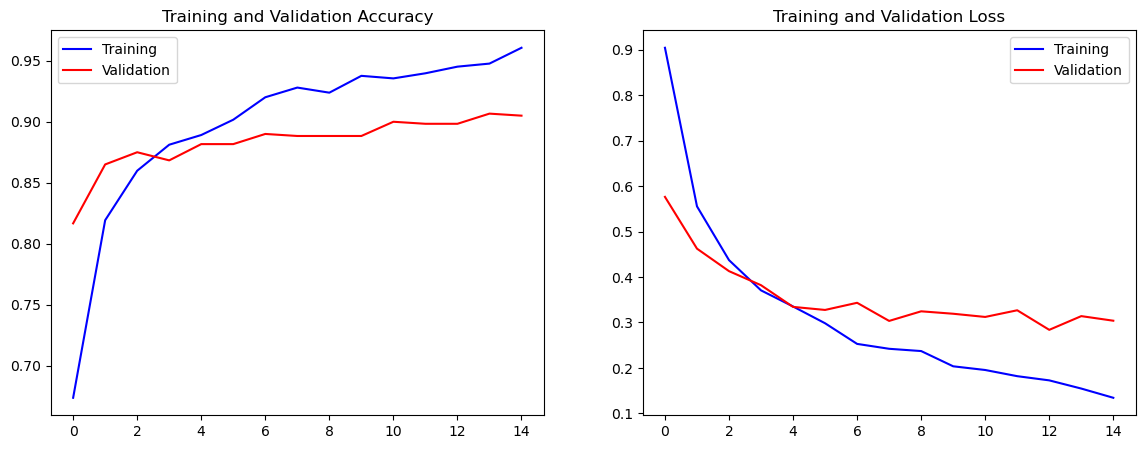

In [28]:
plt.figure(figsize=(14, 5))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot visualization
plt.subplot(1, 2, 1)
accuracy_plot, = plt.plot(epochs, accuracy, color="blue")
val_accuracy_plot, = plt.plot(epochs, val_accuracy, color="red")
plt.title('Training and Validation Accuracy')
plt.legend([accuracy_plot, val_accuracy_plot],['Training', 'Validation'])


plt.subplot(1, 2, 2)
loss_plot, = plt.plot(epochs, loss, color="blue")
val_loss_plot, = plt.plot(epochs, val_loss, color="red")
plt.title('Training and Validation Loss')
plt.legend([loss_plot, val_loss_plot],['Training', 'Validation'])

In [47]:
model.save('model_fv_resnet50.h5')

## Initial Model without Feature Vector or Transfer Learning

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ]) 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

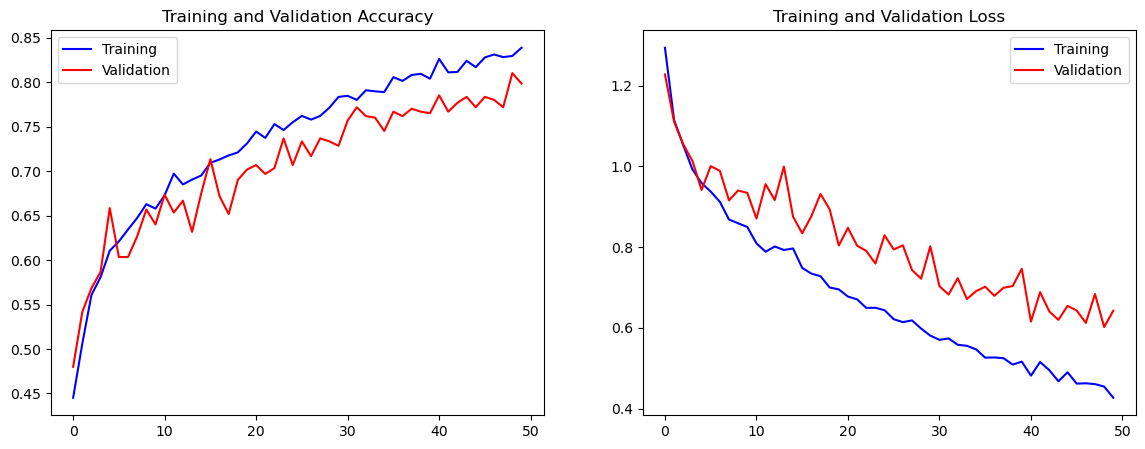

In [39]:
plt.figure(figsize=(14, 5))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot visualization
plt.subplot(1, 2, 1)
accuracy_plot, = plt.plot(epochs, accuracy, color="blue")
val_accuracy_plot, = plt.plot(epochs, val_accuracy, color="red")
plt.title('Training and Validation Accuracy')
plt.legend([accuracy_plot, val_accuracy_plot],['Training', 'Validation'])


plt.subplot(1, 2, 2)
loss_plot, = plt.plot(epochs, loss, color="blue")
val_loss_plot, = plt.plot(epochs, val_loss, color="red")
plt.title('Training and Validation Loss')
plt.legend([loss_plot, val_loss_plot],['Training', 'Validation'])

In [ ]:
model.save('initial_model.h5')

## Check Validation Pictures and the Corresponding Labels

## Unused Codes

In [24]:
# def identity_block(input_tensor, filter):
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(input_tensor)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)

#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)

#     x = tf.keras.layers.Add()([x, input_tensor])     
#     x = tf.keras.layers.Activation('relu')(x)
#     return x

# def resnet(shape=(150, 150, 3), num_class=6):
#     # Input Block
#     x_input = tf.keras.layers.Input(shape)
#     x = tf.keras.layers.Conv2D(64, 7, padding='same')(x_input)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPool2D((3, 3))(x)

#     # Identity Block
#     x = identity_block(x, 64)
#     x = identity_block(x, 64)
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = tf.keras.layers.Dense(num_class, activation='softmax')(x)
#     return tf.keras.models.Model(inputs = x_input, outputs = x, name = "1StagesResNet")

# model = resnet(shape=(150, 150, 3), num_class=6)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy']) 